In [1]:
## 1.Read the data
## 2.Drop all unnessasery columns[NA%>50,Unique,Same]
## 3.Train test split
## 4.Fill the issing valuue
## 5.One hot encode  Categorical
## 6.Scale the continous
## 7.Buil the model
## 8.Test

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')
import sweetviz

In [3]:
df=pd.read_csv('Telco_Customer_Churn_Data.csv ')
df.head(2)

df['Churn']=df['Churn'].map({'Yes':1,'No':0}) # Representing yes and no by 1 or 0

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
y=df['Churn']
df.drop(['Churn'],axis=1,inplace=True)
#X=df.iloc[:,:-1]

In [5]:
#df.drop(['customerID'],axis=1,inplace=True)

## Missing Value Treatment

In [6]:
na_percentage_df=pd.DataFrame({'Column_Name':df.columns,
                               'Missing_value_count':df.isnull().sum(),
                               'Missing_value_percentage':df.isnull().sum()/df.shape[0]*100})

na_percentage_df=na_percentage_df.sort_values(by='Missing_value_percentage',ascending=False)


## Dropping Columns

In [7]:
cols_to_drop=[]

cols_with_na_grt_50=list(na_percentage_df[na_percentage_df['Missing_value_percentage']>50].index)

for col in df.columns:
    if df[col].nunique()==df.shape[0] or df[col].nunique()==1:
        cols_to_drop.append(col)
        

columns_to_drop=cols_to_drop+cols_with_na_grt_50

df.drop(columns=columns_to_drop,inplace=True)


# Train_test_split

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=43)

# Filling missing values

In [9]:
for col in X_train.columns:
    if X_train[col].dtype=='object':
        X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
        X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
        
    else:
        X_train[col]=X_train[col].fillna(X_train[col].mean())
        X_test[col]=X_test[col].fillna(X_train[col].mean())

  

# One Hot Encoding

In [10]:
num_cols= [col for col in X_train.columns if X_train[col].dtype!='object']

cat_cols= [col for col in X_train.columns if X_train[col].dtype=='object']

one_hot_train=pd.get_dummies(X_train[cat_cols]) # one-hot encoding

one_hot_train

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
6837,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5486,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5536,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
156,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1775,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2325,1,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2303,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3392,1,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
one_hot_train=one_hot_train

In [12]:
one_hot_train.shape
one_hot_train

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
6837,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5486,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5536,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
156,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1775,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2325,1,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2303,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3392,1,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
one_hot_test=pd.get_dummies(X_test[cat_cols])

In [14]:
one_hot_test.shape
one_hot_test

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,TotalCharges_978.6,TotalCharges_98.35,TotalCharges_985.05,TotalCharges_989.05,TotalCharges_99.6,TotalCharges_990.3,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_996.45,TotalCharges_997.75
1826,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2342,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6901,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
972,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4281,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1355,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1369,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train_final,X_test_final=one_hot_train.align(one_hot_test,join='inner',axis=1,fill_value=0)


# Fitting Model LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train_final,y_train)
logreg_pred=logreg.predict(X_test_final)
logreg_pred
print('Train score',logreg.score(X_train_final,y_train))
print('Test Score',logreg.score(X_test_final,y_test))


Train score 0.7877174298899539
Test Score 0.8034066713981547


# Correlation Check

In [17]:
from scipy.stats import chi2_contingency as chi
corr_cat_cols=[]
for col in cat_cols:
    con_table=pd.crosstab(df[col],y)
    p=chi(con_table)[1]
    if(p<0.05):
        corr_cat_cols.append(col)
corr_cat_cols

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# Anova Testing

In [18]:
from scipy.stats import f_oneway
def anova(cat_cols,num_cols):
    l=[]
    for i in set(cat_cols):
        arg=[]
        for j in range(len(cat_cols)):
            if(cat_cols[j]==i):
                arg.append(num_cols[j])
        l.append(arg)
    return f_oneway(*l)
for col in num_cols:
        print(col)
        print(anova(list(y),list(df[col])))
corr_num_cols=num_cols

SeniorCitizen
F_onewayResult(statistic=164.04142445613562, pvalue=3.839860055795412e-37)
tenure
F_onewayResult(statistic=997.2680104991438, pvalue=7.999057960610892e-205)
MonthlyCharges
F_onewayResult(statistic=273.4637042077133, pvalue=2.7066456068950115e-60)


## Preprocessing

In [19]:
preprocessed_df=pd.DataFrame(columns=[])
for i in corr_cat_cols:
    preprocessed_df[i]=df[i]
for i in corr_num_cols:
    preprocessed_df[i]=df[i]
preprocessed_df

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,1,29.85
1,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,34,56.95
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0,2,53.85
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,45,42.30
4,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,24,84.80
7039,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,72,103.20
7040,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,11,29.60
7041,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1,4,74.40


# Lasso

In [20]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X_train_final,pd.get_dummies(y_train))
pred=lasso_reg.predict(X_test_final)
pred

array([[0.73393681, 0.26606319],
       [0.73393681, 0.26606319],
       [0.73393681, 0.26606319],
       ...,
       [0.73393681, 0.26606319],
       [0.73393681, 0.26606319],
       [0.73393681, 0.26606319]])

# Schochastic Gradient Descent Classifier(SGDClassifier)

In [21]:
from sklearn.linear_model import SGDClassifier
sgd_reg=SGDClassifier(alpha=1)
sgd_reg.fit(X_train_final,y_train)
pred=sgd_reg.predict(X_test_final)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

ds_tree=DecisionTreeClassifier()
ds_tree.fit(X_train_final,y_train)
pred=ds_tree.predict(X_test_final)
print('Train score',ds_tree.score(X_train_final,y_train))
print('Test Score',ds_tree.score(X_test_final,y_test))


Train score 0.9187078452254172
Test Score 0.7182398864442867


# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=list(range(20,200,20))
accuracy=[]

for num in n_estimators:
    rf=RandomForestClassifier(n_estimators=num)
    rf.fit(X_train_final,y_train)
    accuracy.append(rf.score(X_train_final,y_train))   

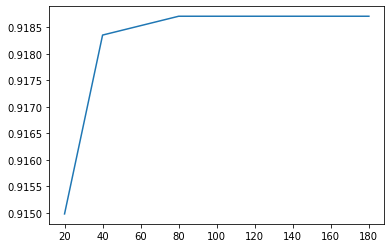

In [24]:
import matplotlib.pyplot as plt

plt.plot(n_estimators,accuracy)


# Ada Boost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

learning_rate=[0.2,0.4,0.6,0.8]
n_estimators=np.arange(10,200,20)
accuracy=[]

for num in learning_rate:
    abc=AdaBoostClassifier(learning_rate=num)
    abc.fit(X_train_final,y_train)
    accuracy.append(abc.score(X_train_final,y_train))   

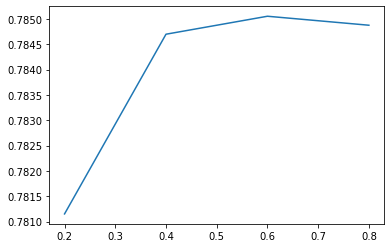

In [26]:
import matplotlib.pyplot as plt

plt.plot(learning_rate,accuracy)

# Hyperparameter Tuning

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier(random_state=42)

param_dict={
            'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9,10],
            'max_features':['auto','sqrt','log2']
           }
grid=RandomizedSearchCV(rf,param_dict,cv=5,verbose=5)
grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=9, max_features=auto, min_samples_split=7, n_estimators=100; total time=   1.4s
[CV 2/5] END max_depth=9, max_features=auto, min_samples_split=7, n_estimators=100; total time=   1.2s
[CV 3/5] END max_depth=9, max_features=auto, min_samples_split=7, n_estimators=100; total time=   1.2s
[CV 4/5] END max_depth=9, max_features=auto, min_samples_split=7, n_estimators=100; total time=   1.4s
[CV 5/5] END max_depth=9, max_features=auto, min_samples_split=7, n_estimators=100; total time=   1.3s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70; total time=   1.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70; total time=   1.0s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70; total time=   1.2s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70; total time=   0.9s
[CV 5/5] END

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 7, 9],
                                        'n_estimators': [50, 60, 70, 100]},
                   verbose=5)

In [35]:
print(grid.best_params_)

{'n_estimators': 50, 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 8}


In [36]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_split=7,
                       n_estimators=50, random_state=42)


In [37]:
print(grid.best_score_)

0.7820380109724019


# Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_final,y_train)
pred=gnb.predict(X_test_final)
print('Train score',gnb.score(X_train_final,y_train))
print('Test Score',gnb.score(X_test_final,y_test))


Train score 0.5688675896343628
Test Score 0.5592618878637331


# Support Vector Machine (SVM)

## Support Vector Classifier

In [39]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_final,y_train)
pred=svc.predict(X_test_final)
print('Train score',svc.score(X_train_final,y_train))
print('Test Score',svc.score(X_test_final,y_test))

Train score 0.7964146254881079
Test Score 0.801277501774308


## Hyperparameter Tuning (SVC)

In [40]:
param_dict={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

grid=RandomizedSearchCV(svc,param_dict,refit=True,verbose=3)
grid.fit(X_train_final,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   7.2s
[CV 2/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   7.1s
[CV 3/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   7.2s
[CV 4/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   7.3s
[CV 5/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   7.4s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  22.6s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  20.8s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  21.9s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  20.5s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=  24.3s
[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   7.4s
[CV 2/5] END ..................C=10, gamma=0.001

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [41]:
print(grid.best_params_)

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}


In [42]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.001)


In [43]:
print(grid.best_score_)

0.779731001211976


#  K Nearest Neighbors Classifier


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier( n_neighbors=5)
knn.fit(X_train_final,y_train)
pred=knn.predict(X_test_final)
print('Train Score',knn.score(X_train_final,y_train))
print('Test Score',knn.score(X_test_final,y_test))


Train Score 0.8115015974440895
Test Score 0.7430801987224982


# Unsupervised Machine Learning
## K-Means Clustering

Text(0.5, 1.0, 'Elbow Curve')

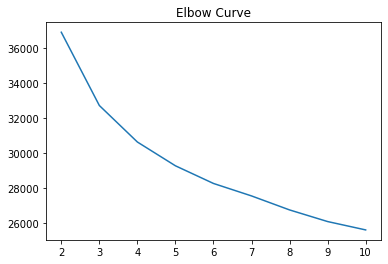

In [47]:
from sklearn.cluster import KMeans
kmns=KMeans()
kmns.fit(X_train_final)

#finding the optimul number of clusters

num_clusters=range(2,11)

wss=[] # Within Sum Of Square(WSS)

for n in num_clusters:
    kmns=KMeans(n_clusters=n)
    kmns.fit(X_train_final)
    wss.append(kmns.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')
    

# Variance Inflation Factor

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif["features"] = X_train_final.columns
vif